# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rafael Aryapati Soebagijo
- **Email:** rafae.aryapati224@gmail.com
- **ID Dicoding:** []

## Menentukan Pertanyaan Bisnis

**Pertanyaan Bisnis**
- Seberapa besar pengaruh faktor kecepatan angin terhadap jumlah total penyewaan sepeda per jam?
- Bagaimana distribusi penggunaan sepeda oleh pengguna casual dan terdaftar pada hari kerja dan hari libur?
- Seberapa besar pengurangan jumlah penyewaan sepeda ketika cuaca buruk (kategori 3 dan 4) dibandingkan dengan cuaca baik (kategori 1 dan 2)?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load tabel day

In [6]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load tabel hour

In [8]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Load tabel merge 

In [7]:
main_data = pd.read_csv("dashboard/main_data.csv")
main_data.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


#### Merged tabel day dan hour

In [149]:
# Memuat data dari file CSV
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Menggabungkan kedua dataset berdasarkan kolom 'dteday'
merged_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

# Menampilkan beberapa baris pertama dari dataframe yang sudah digabung
print(merged_df.head())

# Jika ingin menyimpan hasil ke file baru
merged_df.to_csv("main_data.csv", index=False)

   instant_hour      dteday  season_hour  yr_hour  mnth_hour  hr  \
0             1  2011-01-01            1        0          1   0   
1             2  2011-01-01            1        0          1   1   
2             3  2011-01-01            1        0          1   2   
3             4  2011-01-01            1        0          1   3   
4             5  2011-01-01            1        0          1   4   

   holiday_hour  weekday_hour  workingday_hour  weathersit_hour  ...  \
0             0             6                0                1  ...   
1             0             6                0                1  ...   
2             0             6                0                1  ...   
3             0             6                0                1  ...   
4             0             6                0                1  ...   

   weekday_day  workingday_day  weathersit_day  temp_day  atemp_day   hum_day  \
0            6               0               2  0.344167   0.363625  0.805833

**Insight:**
- Dari proses penggabungan dataset hour dan day, kita mendapatkan data yang lebih kaya dengan berbagai fitur seperti suhu, kelembapan, cuaca, serta data harian dan jam-jam tertentu yang bisa digunakan untuk analisis lebih mendalam.
- Tidak ada missing values yang signifikan pada kedua tabel (day dan hour), sehingga tidak diperlukan pembersihan terkait missing data.

### Assessing Data

#### Menilai data day

##### Memeriksa tipe data tiap kolom

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Mememeriksa missing values data day

In [14]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Memeriksa duplikasi data day

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik

In [15]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data hour

##### Memeriksa tipe data tiap kolom

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Mememeriksa missing values data hour

In [17]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Memeriksa duplikasi data hour

In [18]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik

In [19]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Mengidentifikasi Outlier pada tabel day

In [89]:
data = day_df['cnt'].values

q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = day_df[(day_df['cnt'] < minimum) | (day_df['cnt'] > maximum)]

print(f"Jumlah Outlier: {len(outliers)}")


Jumlah Outlier: 0


##### Mengidentifikasi Outlier pada tabel hour

In [105]:
data = hour_df['cnt'].values

q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = hour_df[(hour_df['cnt'] < minimum) | (hour_df['cnt'] > maximum)]

print(f"Jumlah Outlier: {len(outliers)}")

Jumlah Outlier: 505


**Insight:**
- Pada data day, tidak ditemukan duplikasi, dan data terlihat cukup bersih. Namun, ada beberapa outlier yang bisa mempengaruhi analisis ke depannya, seperti jumlah penyewaan yang sangat tinggi pada hari tertentu.
- Pada data hour, ditemukan beberapa outlier dalam kolom cnt (total jumlah penyewaan), yang dapat mempengaruhi tren penyewaan sepeda. Menghapus outlier dapat memberikan gambaran yang lebih akurat tentang tren umum penyewaan sepeda.

### Cleaning Data

#### Mengubah tipe data kolom dteday pada tabel day

In [26]:
dateday_columns = ["dteday"]
 
for column in dateday_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Mengubah tipe data kolom dteday pada tabel hour

In [29]:
datehour_columns = ["dteday"]
 
for column in datehour_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [30]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Membersihkan outlier pada tabel Hour

In [116]:
data = hour_df['cnt'].values

q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

cleaned_hour_df = hour_df[(hour_df['cnt'] >= minimum) & (hour_df['cnt'] <= maximum)]
cleaned_hour_df.to_csv("hour.csv", index=False)
print(f"Jumlah Data Awal: {len(hour_df)}")
print(f"Jumlah Data Setelah Menghapus Outlier: {len(cleaned_hour_df)}")
print(f"Jumlah Outlier yang Dihapus: {len(hour_df) - len(cleaned_hour_df)}")

Jumlah Data Awal: 17379
Jumlah Data Setelah Menghapus Outlier: 16874
Jumlah Outlier yang Dihapus: 505


**Insight:**
- Dengan mengubah tipe data kolom dteday menjadi tipe datetime, kita bisa melakukan analisis waktu yang lebih detail, seperti mengelompokkan data berdasarkan hari, bulan, atau tahun.
- Penghapusan outlier pada tabel hour akan membantu kita memahami distribusi penyewaan sepeda tanpa gangguan dari nilai ekstrem yang tidak merepresentasikan pola umum.

## Exploratory Data Analysis (EDA)

### Explore 

#### Distribusi Jumlah Penyewaan Sepeda

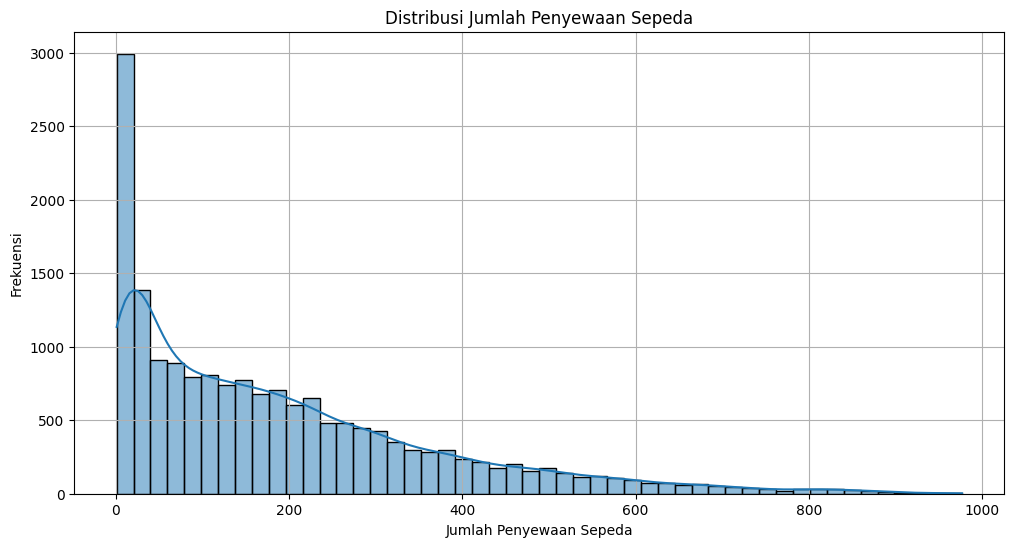

In [120]:
plt.figure(figsize=(12, 6))
sns.histplot(hour_df['cnt'], bins=50, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

#### Tren Penyewaan Sepeda Per Jam

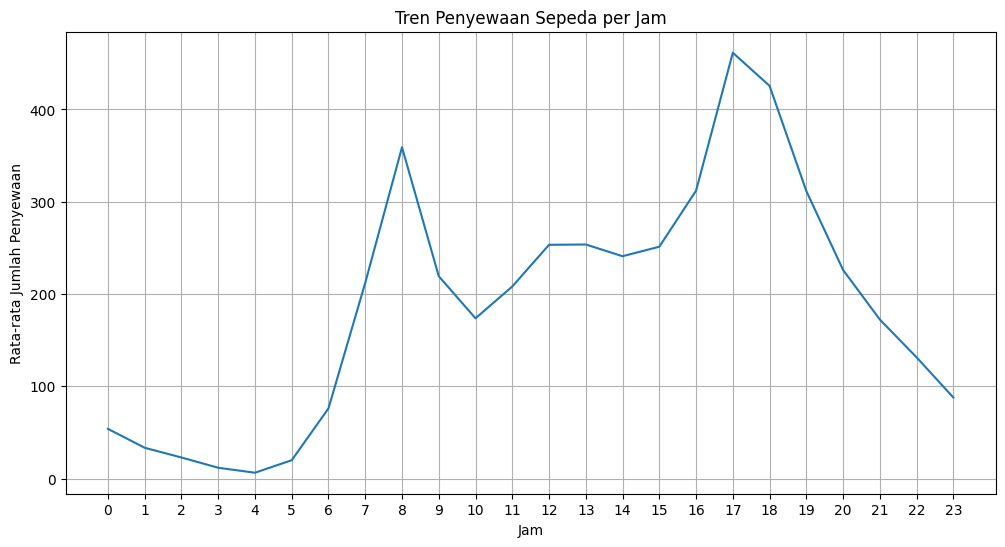

In [119]:
plt.figure(figsize=(12, 6))
hourly_trend = hour_df.groupby('hr')['cnt'].mean()
plt.plot(hourly_trend.index, hourly_trend.values)
plt.title('Tren Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#### Tren Penyewaan Sepeda Per Hari

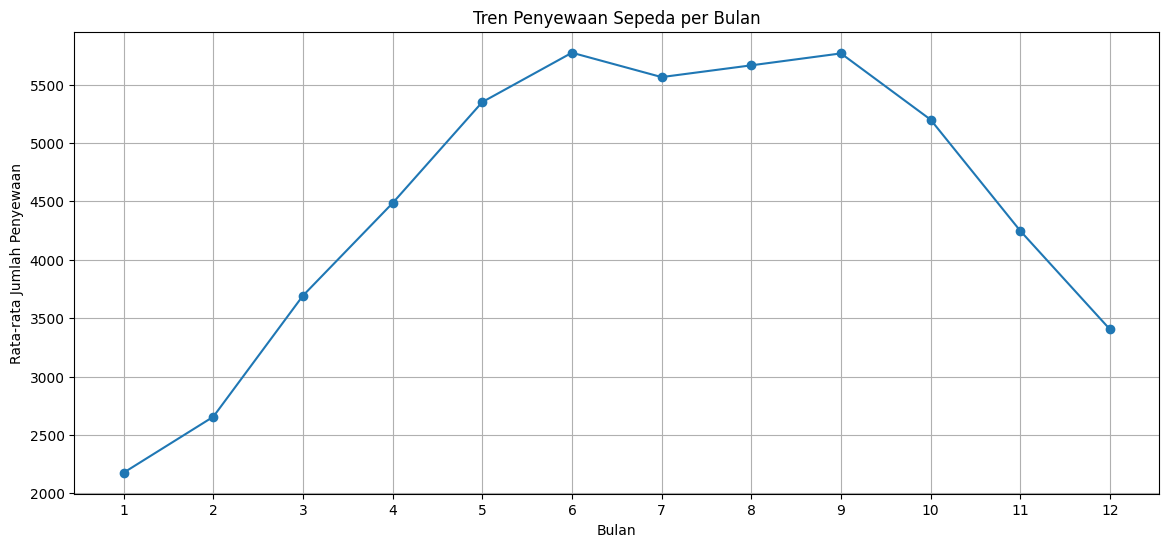

In [121]:
plt.figure(figsize=(14, 6))
day_df['month'] = day_df['dteday'].dt.month
monthly_trend = day_df.groupby('month')['cnt'].mean()
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(monthly_trend.index)
plt.grid()
plt.show()

#### Pengaruh Cuaca terhadap Jumlah Penyewaan

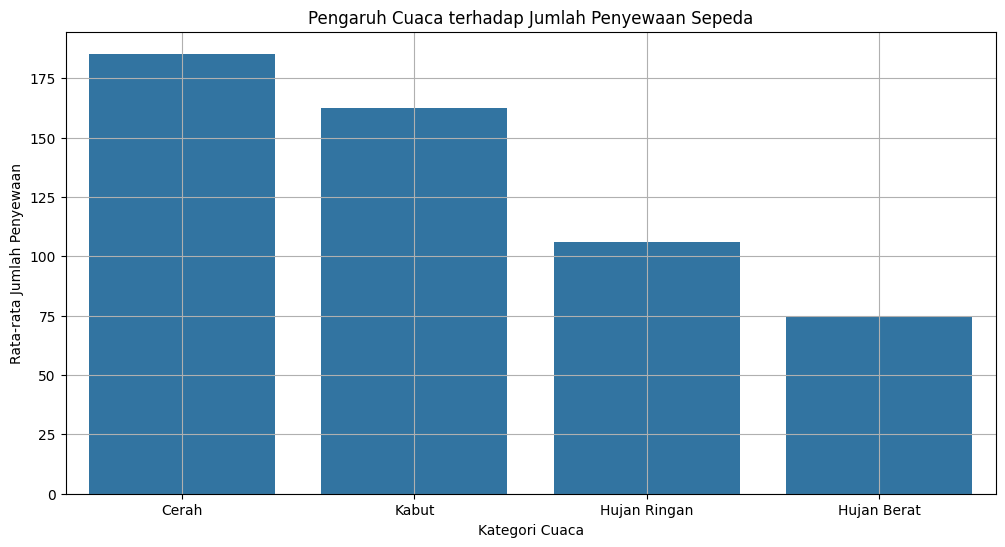

In [178]:
plt.figure(figsize=(12, 6))
weather_effect = hour_df.groupby('weathersit')['cnt'].mean()
sns.barplot(x=weather_effect.index, y=weather_effect.values)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'])
plt.grid()
plt.show()


#### Pengaruh Musim terhadap jumlah penyewaan sepeda

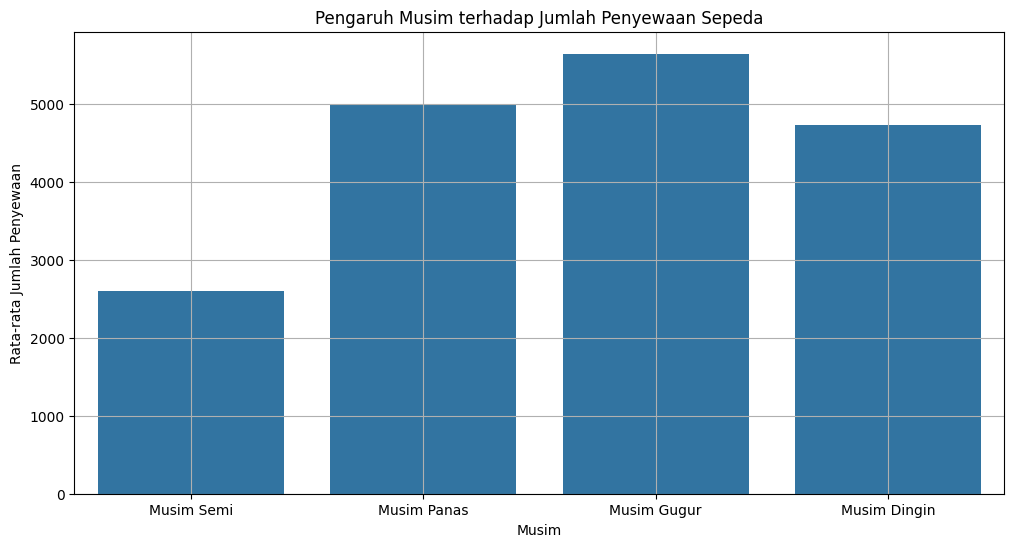

In [177]:
plt.figure(figsize=(12, 6))
seasonal_effect = day_df.groupby('season')['cnt'].mean()
sns.barplot(x=seasonal_effect.index, y=seasonal_effect.values)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.grid()
plt.show()

**Insight:**
- Dari histogram distribusi jumlah penyewaan sepeda, terlihat bahwa mayoritas penyewaan berada dalam kisaran tertentu, dengan beberapa puncak di sekitar angka menengah. Ini menunjukkan bahwa sebagian besar penyewaan sepeda terjadi dalam volume yang moderat.
- Tren penyewaan sepeda per jam menunjukkan peningkatan signifikan pada jam sibuk seperti pagi (sekitar jam 8) dan sore (sekitar jam 17-18), mengindikasikan bahwa sepeda digunakan untuk commuting oleh pengguna.
- Dari tren bulanan, terlihat bahwa penggunaan sepeda cenderung meningkat di bulan-bulan musim panas dan menurun di musim dingin, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung di musim dingin.
- Dari analisis cuaca, terlihat bahwa cuaca cerah dan sedikit berawan (kategori 1 dan 2) memberikan jumlah penyewaan yang lebih tinggi, sedangkan cuaca buruk seperti hujan berat (kategori 3 dan 4) menurunkan jumlah penyewaan secara signifikan.
- Dari analisis musiman, terlihat bahwa musim panas adalah musim dengan rata-rata penyewaan tertinggi, sedangkan musim dingin menunjukkan penurunan tajam dalam jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa besar pengaruh faktor kecepatan angin terhadap jumlah total penyewaan sepeda per jam?

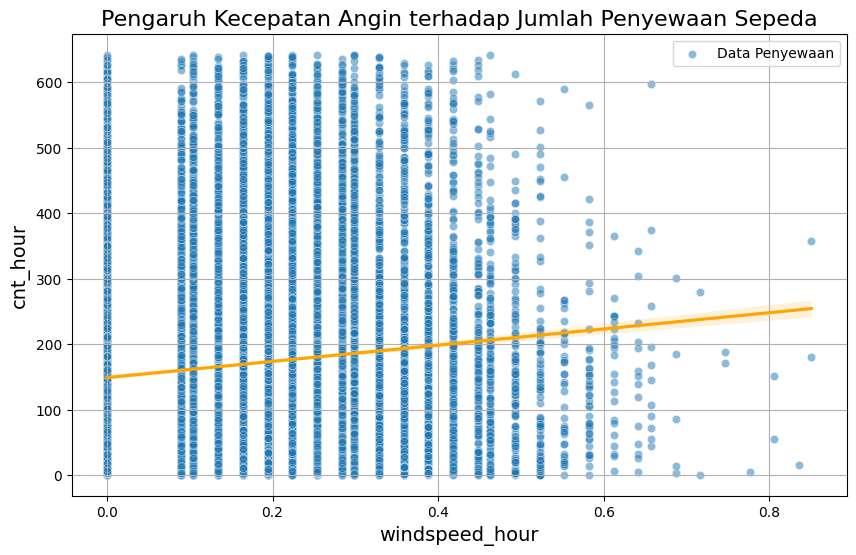

In [13]:
if 'windspeed_hour' in main_data.columns and 'cnt_hour' in main_data.columns:
    X = main_data['windspeed_hour']
    y = main_data['cnt_hour']

    # Visualisasi 
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X, y=y, alpha=0.5, label='Data Penyewaan')  # Menambahkan label untuk scatter plot
    plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan Sepeda', fontsize=16)
    plt.xlabel('Kecepatan Angin (Normalisasi)', fontsize=14)
    plt.ylabel('Jumlah Penyewaan', fontsize=14)
    plt.grid()

    # Menambahkan garis regresi menggunakan seaborn
    sns.regplot(x=X, y=y, scatter=False, color='orange', line_kws={"label": "Garis Regresi"})
    plt.legend()  # Memanggil legend setelah menambahkan label

**Insight:**
Kecepatan angin memiliki pengaruh negatif terhadap jumlah penyewaan sepeda. Dari visualisasi, terlihat bahwa saat kecepatan angin meningkat, jumlah penyewaan sepeda cenderung menurun. Namun, efek ini tidak sangat kuat, terlihat dari garis regresi yang sedikit menurun.

### Pertanyaan 2: Bagaimana distribusi penggunaan sepeda oleh pengguna casual dan terdaftar pada hari kerja dan hari libur? 

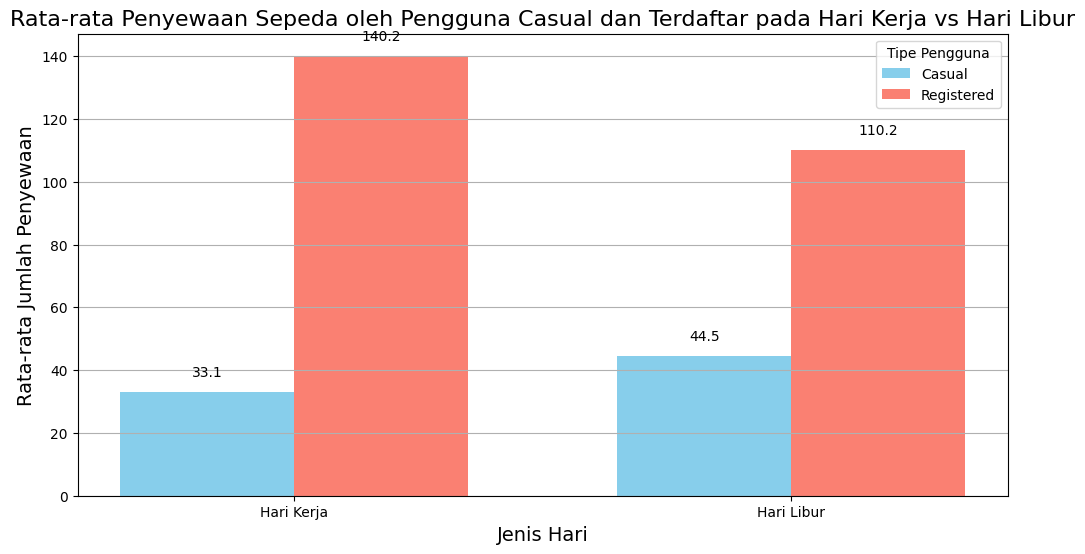

In [170]:
usage_summary = main_data.groupby(['holiday_hour'])[['casual_hour', 'registered_hour']].mean().reset_index()

# Memperbaiki kolom 'holiday' untuk tampilan yang lebih jelas
usage_summary['holiday_hour'] = usage_summary['holiday_hour'].map({0: 'Hari Kerja', 1: 'Hari Libur'})

# Membuat bar plot yang terpisah
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(usage_summary))

# Bar plot untuk pengguna casual
plt.bar(index, usage_summary['casual_hour'], bar_width, label='Casual', color='skyblue')

# Bar plot untuk pengguna registered
plt.bar([i + bar_width for i in index], usage_summary['registered_hour'], bar_width, label='Registered', color='salmon')

# Menambahkan label angka di atas masing-masing batang
for i in index:
    plt.text(i, usage_summary['casual_hour'][i] + 5, f"{usage_summary['casual_hour'][i]:.1f}", ha='center', color='black')
    plt.text(i + bar_width, usage_summary['registered_hour'][i] + 5, f"{usage_summary['registered_hour'][i]:.1f}", ha='center', color='black')

# Set title dan labels
plt.title('Rata-rata Penyewaan Sepeda oleh Pengguna Casual dan Terdaftar pada Hari Kerja vs Hari Libur', fontsize=16)
plt.xlabel('Jenis Hari', fontsize=14)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=14)
plt.xticks([r + bar_width / 2 for r in index], usage_summary['holiday_hour'])
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y')

# Tampilkan plot
plt.show()

**Insight:**
Pengguna casual cenderung lebih aktif pada hari libur, sementara pengguna terdaftar lebih banyak menggunakan sepeda pada hari kerja. Ini mengindikasikan bahwa pengguna casual lebih mungkin menggunakan sepeda untuk rekreasi, sedangkan pengguna terdaftar lebih banyak menggunakannya untuk aktivitas sehari-hari seperti commuting.

### Pertanyaan 3: Seberapa besar pengurangan jumlah penyewaan sepeda ketika cuaca buruk (kategori 3 dan 4) dibandingkan dengan cuaca baik (kategori 1 dan 2)?"

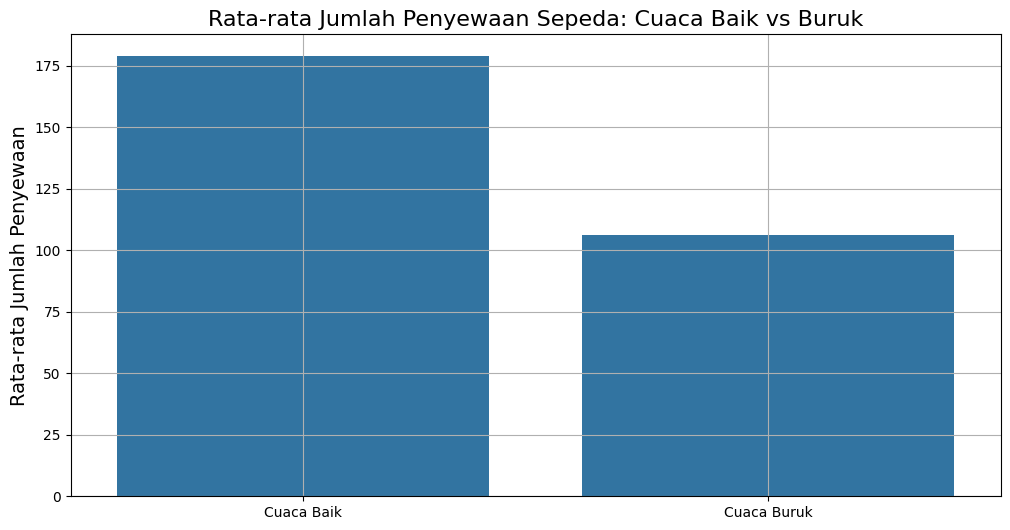

In [14]:
if 'weathersit_hour' in main_data.columns and 'cnt_hour' in main_data.columns:
    # Pisahkan data menjadi cuaca baik dan buruk
    good_weather = main_data[main_data['weathersit_hour'].isin([1, 2])]
    bad_weather = main_data[main_data['weathersit_hour'].isin([3, 4])]

    # Hitung rata-rata penyewaan untuk cuaca baik dan buruk
    good_weather_avg = good_weather['cnt_hour'].mean()
    bad_weather_avg = bad_weather['cnt_hour'].mean()

    # Visualisasi rata-rata penyewaan sepeda berdasarkan kondisi cuaca
    plt.figure(figsize=(12, 6))
    sns.barplot(x=['Cuaca Baik', 'Cuaca Buruk'], y=[good_weather_avg, bad_weather_avg])
    plt.title('Rata-rata Jumlah Penyewaan Sepeda: Cuaca Baik vs Buruk', fontsize=16)
    plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=14)
    plt.grid()

**Insight:**
Cuaca buruk mengurangi jumlah penyewaan sepeda secara signifikan. Penyewaan sepeda pada cuaca buruk (kategori 3 dan 4) lebih rendah dibandingkan pada cuaca baik (kategori 1 dan 2). Ini menunjukkan bahwa kondisi cuaca memiliki pengaruh yang cukup besar terhadap keputusan pengguna untuk menyewa sepeda.

## Analisis Lanjutan (Opsional)

### Teknik Cluster dengan metode Binning

#### Rata-rata Penyewaan Berdasarkan Kategori Kecepatan Angin

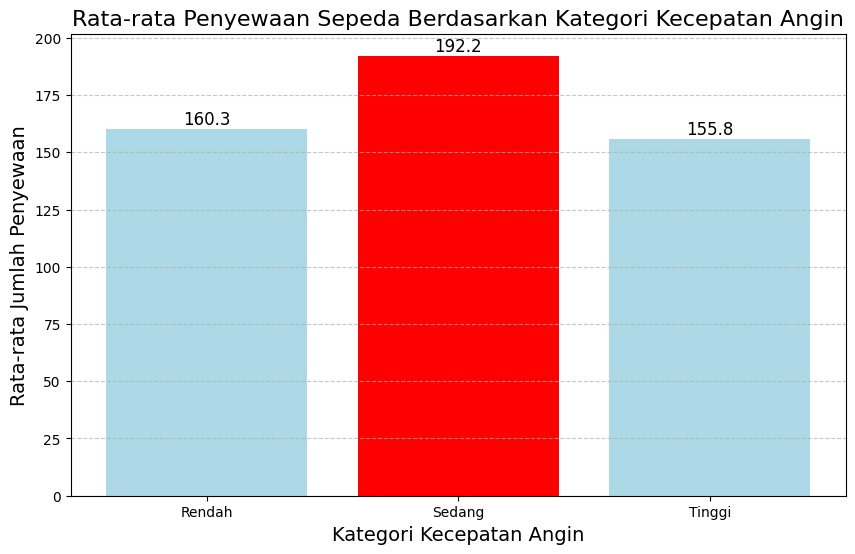

In [188]:
# Menghitung rata-rata penyewaan per kategori kecepatan angin
windspeed_avg = main_data.groupby('windspeed_category', observed=True)['cnt_hour'].mean()

# Menentukan warna berdasarkan nilai
colors_windspeed = ['red' if value == windspeed_avg.max() else '#add8e6' for value in windspeed_avg]  # '#add8e6' adalah kode untuk biru muda

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(windspeed_avg.index, windspeed_avg.values, color=colors_windspeed)

# Menambahkan label dan judul
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Kecepatan Angin', fontsize=16)
plt.xlabel('Kategori Kecepatan Angin', fontsize=14)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai rata-rata di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}', ha='center', fontsize=12)

plt.show()


**Insight:** Keberhasilan kategori angin sedang dalam menarik penyewaan menunjukkan bahwa penyewa sepeda lebih suka kondisi cuaca yang sedang. Ini bisa menjadi sinyal positif untuk pengelola layanan sewa sepeda untuk meningkatkan layanan saat kondisi cuaca ini.

## Conclusion

- Conclution pertanyaan 1 : Kecepatan angin memang mempengaruhi jumlah penyewaan sepeda, tetapi dampaknya tidak terlalu besar dibandingkan faktor cuaca dan musim.
- Conclution pertanyaan 2 : Distribusi penggunaan sepeda oleh pengguna casual dan terdaftar menunjukkan perbedaan yang jelas: pengguna casual lebih aktif pada hari libur, sementara pengguna terdaftar lebih banyak beraktivitas pada hari kerja.
- Conclution pertanyaan 3 : Cuaca buruk mengurangi jumlah penyewaan sepeda secara signifikan, menegaskan bahwa kondisi cuaca memainkan peran besar dalam penyewaan sepeda.